In [ ]:
import pandas as pd
import matplotlib
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'would', 'could', 'may', 'one', 'I', 'It', 'but', 'also', 'this', 'that', 'they', 'it', 'The', 'But', 'And', 'A', 'We', 'They', 'This', 'That', 'In', 'These', 'even', 'There', 'As', 'If', 'He', 'us', 'For'])
import pandas as pd
import numpy as np
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
Downsizing_df = pd.read_csv("/gdrive/My Drive/Neoliber_2020.csv")

In [ ]:
Downsizing_df

,Unnamed: 0,author,body,date,title,url,year,month,day
0,0.0,Matt Kilcoyne,With the release of the details of the make-up...,2020-05-04,WHITHER THE ECONOMISTS WHILE THE ECONOMY WITHE...,https://www.adamsmith.org/news/whither-the-eco...,2020.0,5.0,4.0
1,1.0,Madsen Pirie,Cost-benefit analysis is a useful tool for wor...,2020-05-10,WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COV...,https://www.adamsmith.org/blog/were-missing-co...,2020.0,5.0,10.0
2,2.0,Dr Smith,I have been asked how medicine is practised di...,2020-04-29,MEDICINE DURING COVID,https://www.adamsmith.org/despatches/medicine-...,2020.0,4.0,29.0
3,3.0,Lance Forman,The Government is going about supporting the e...,2020-03-19,COVID19: HOW TO DEAL WITH BUSINESS COLLAPSE AN...,https://www.adamsmith.org/blog/covid19-how-do-...,2020.0,3.0,19.0
4,4.0,Eamonn Butler,"Too late now, but I think I understand why min...",2020-04-27,WHY THE POLICE GOT IT SO WRONG ON ENFORCING CO...,https://www.adamsmith.org/blog/why-the-police-...,2020.0,4.0,27.0
...,...,...,...,...,...,...,...,...,...
781,405.0,Andrew McIndoe,Our most memorable heroes are forged through c...,2020-05-15,"When People See Nonprofits Persevering, They’l...",https://www.heritage.org/jobs-and-labor/commen...,2020.0,5.0,15.0
782,406.0,Tommy Binion,The news has been full of stories on SCOTUS no...,2020-10-13,The Confirmation of Amy Coney Barrett: Opening...,https://www.heritage.org/political-process/com...,2020.0,10.0,13.0
783,407.0,Kay C. James,When the nongovernmental National Coronavirus ...,2020-04-22,COVID-19 Crisis Has Re-Ignited a Sense of Comm...,https://www.heritage.org/civil-society/comment...,2020.0,4.0,22.0
784,408.0,"Kevin Pham, MD",America’s coronavirus testing rates have emerg...,2020-04-26,COVID-19 Testing and the Way Forward on Resumi...,https://www.heritage.org/public-health/comment...,2020.0,4.0,26.0


In [ ]:
# Σβήνω κάποιες στήλες διότι δεν μου προσδίδουν καμία χρήσιμη πληροφορία 

Downsizing_df = Downsizing_df.drop('Unnamed: 0', axis = 1)

In [ ]:
Downsizing_df = Downsizing_df[Downsizing_df.body.notnull()]

In [ ]:
Downsizing_df.shape

(785, 8)

In [ ]:
Downsizing_df['body'][16]

'The ASI’s latest paper, written by ASI Head of Research Matthew Lesh, makes the case for decentralising  COVID-19 diagnostic testing in the United Kingdom:                COVID-19 is the biggest public health emergency in modern history. There have already been over 875,000 confirmed cases and 43,500 deaths worldwide. These numbers are expected to grow exponentially in the coming weeks, potentially resulting in millions of cases and hundreds of thousands of deaths.     The United Kingdom is experiencing a substantial growth in cases and deaths. Over 2,350 people confirmed to have died after contracting the virus. This number is doubling approximately every 3 days, putting the UK on a similar trajectory to the worst affected regions in the world.    Testing is a key tool to combat infectious diseases. It allows doctors to identify the needs of patients, public health authorities to trace and isolate cases to minimise spread, and epidemiologists to track the spread of an outbreak. It is

In [ ]:
Downsizing_df['title'][1]

"WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COVID19 DISCUSSION"

In [ ]:
print(Downsizing_df['title'][785])

New COVID-19 Findings Confirm What We Have Learned Since the Beginning. A Targeted Response Is More Important Than Ever.


Concordances

In [ ]:
#edw prwta epilegoume to keyword kai meta poses lexeis theloume girw apo to keyword

In [ ]:
word2find = input("What word do you want collocates for? ").lower() # AsSa
#name2find = input ("Type the name of the politician?")
context = input ("How much content do you want?")
contextInt = int(context)

What word do you want collocates for? school
How much content do you want?20


In [ ]:
def makeConc(word2conc,list2FindIn,context2Use,concList):

    end = len(list2FindIn)
    for location in range(end):
        pattern = re.compile(word2conc)
        if pattern.match(list2FindIn[location]):
#        if list2FindIn[location] == word2conc:

            # Here we check whether we are at the very beginning or end
            if (location - context2Use) < 0:
                beginCon = 0
            else:
                beginCon = location - context2Use
                
            if (location + context2Use) > end:
                endCon = end
            else:
                endCon = location + context2Use + 1
                
            theContext = (list2FindIn[beginCon:endCon])
            concordanceLine = ' '.join(theContext)
            # print(str(location) + ": " + concordanceLine)
            concList.append(str(location) + ": " + concordanceLine)

In [ ]:
#edw emfanizontai ta apotelesmata poy tha koitaxoume

In [ ]:
theRowConc = []
for index, row in Downsizing_df.iterrows():
    makeConc(word2find, word_tokenize(row['body']), int(context), theRowConc) #here you can change the body to other column
    if  len(theRowConc) > 0:
        print(index, theRowConc)
    theRowConc = []

1 ['230: might sustain injuries playing conkers , but they derive pleasure from playing it , a pleasure denied them when over-cautious schools ban the activity . Traditional village sports , such as annual cheese-rolling , are now routinely banned by health and']
23 ['459: deaths by a few months but these are frail people who were likely to die anyway . There is one school of thought that at least some of the initial deaths represent very frail patients from care homes – some of']
27 ['849: ensure free speech and diversity of ideas are produced throughout the education sector ? Should we be adopting ‘ micro schooling ’ ? Free trade : How can we remake the case for free trade ? Should Britain adopt an entirely']
28 ['748: behaviour during the course of the epidemic…We have not included any age-effects…we are not able to investigate the impact of school closures or the impact of the summer holidays , which had a large impact on the H1N1 influenza pandemic in']
35 ['626: , regions of the 

In [ ]:
def makeCollocates(word2coll,list2FindIn,context2Use,collist):
    end = len(list2FindIn)
    counter = 0
    theCollocates = []
    for word in list2FindIn:
        pattern = re.compile(word2coll)
        if pattern.match(word):       
#        if word == word2coll: # This checks to see if the word is what we want
            for i in range(context2Use):
                if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                    theCollocates.append(list2FindIn[(counter - (i + 1))]) # This adds words before
                if (counter + (i + 1)) < end: # This checks that we aren't at the end
                    theCollocates.append(list2FindIn[(counter + (i + 1))]) # This adds words after
        counter = counter + 1
    if len(theCollocates) > 0:
        collist.append(theCollocates)
    
#print(theCollocates[:10])

In [ ]:
theRowColl = []
theCollocations = []
for index, row in Downsizing_df.iterrows():
    makeCollocates(word2find, word_tokenize(row['body']), int(context), theRowColl) #here you can change the body to other column
#    if  len(theRowColl) > 0:
#        print(index, theRowColl)
    if len(theRowColl) > 0:
        theCollocations.extend(theRowColl)
    theRowColl = []

Collocations

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
punctL = list(set(string.punctuation))

punctL.append('«')
punctL.append('’')
punctL.append('»')
punctL.append('–')
punctL

['#',
 '%',
 '+',
 '*',
 '@',
 '-',
 '_',
 '}',
 '!',
 '?',
 '[',
 '=',
 ',',
 ']',
 '"',
 '{',
 '`',
 '^',
 '&',
 '(',
 "'",
 ')',
 '>',
 '|',
 ';',
 '~',
 '.',
 '<',
 ':',
 '/',
 '$',
 '\\',
 '«',
 '’',
 '»',
 '–']

In [ ]:
Downsizing_df.body = Downsizing_df.body.apply( lambda x: ' '.join([w for w in word_tokenize(x) if (not w in list(set(stop_words).union(punctL))) & w.isalpha() ]))

In [ ]:
def makeCollocates(word2coll,list2FindIn,context2Use,collist):
    end = len(list2FindIn)
    counter = 0
    theCollocates = []
    for word in list2FindIn:
        pattern = re.compile(word2coll)
        if pattern.match(word):       
#        if word == word2coll: # This checks to see if the word is what we want
            for i in range(context2Use):
                if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                    theCollocates.append(list2FindIn[(counter - (i + 1))]) # This adds words before
                if (counter + (i + 1)) < end: # This checks that we aren't at the end
                    theCollocates.append(list2FindIn[(counter + (i + 1))]) # This adds words after
        counter = counter + 1
    if len(theCollocates) > 0:
        collist.append(theCollocates)
    
#print(theCollocates[:10])

In [ ]:
theRowColl = []
theCollocations = []
for index, row in Downsizing_df.iterrows():
    makeCollocates(word2find, word_tokenize(row['body']), int(context), theRowColl) #here you can change the body to other column
#    if  len(theRowColl) > 0:
#        print(index, theRowColl)
    if len(theRowColl) > 0:
        theCollocations.extend(theRowColl)
    theRowColl = []

In [ ]:
import itertools
mergedCollocations = list(itertools.chain(*theCollocations))
CollocationsNoStopWords =  [w for w in mergedCollocations if (not w in list(set(stop_words))) ]
print(CollocationsNoStopWords)

['denied', 'ban', 'pleasure', 'activity', 'playing', 'Traditional', 'pleasure', 'village', 'derive', 'sports', 'conkers', 'annual', 'playing', 'routinely', 'injuries', 'banned', 'sustain', 'health', 'might', 'safety', 'children', 'officers', 'Yes', 'looking', 'benefits', 'possible', 'ignore', 'sprains', 'risk', 'fractures', 'look', 'might', 'culture', 'come', 'accustomed', 'rough', 'become', 'tumble', 'people', 'activities', 'anyway', 'thought', 'die', 'least', 'likely', 'initial', 'people', 'deaths', 'frail', 'represent', 'months', 'frail', 'deaths', 'patients', 'forward', 'care', 'bring', 'homes', 'tends', 'never', 'winter', 'made', 'snap', 'hospital', 'cold', 'possible', 'first', 'combination', 'words', 'evolving', 'excess', 'herd', 'matches', 'immunity', 'basically', 'plus', 'deaths', 'tragic', 'reduction', 'early', 'micro', 'Free', 'adopting', 'trade', 'Should', 'How', 'sector', 'remake', 'education', 'case', 'throughout', 'free', 'produced', 'trade', 'ideas', 'Should', 'diversity

In [ ]:
import nltk
tokenDist = nltk.FreqDist(CollocationsNoStopWords)
tokenDist.tabulate(40)

    schools      school    students     private    children   education      public    families     parents       state        year        many    learning      online   districts    district     federal       local    pandemic      states        work       child      closed     provide        week instruction  government     million    teachers      choice        home         new    spending     student      reopen   officials        help      health      access        time 
        648         528         400         383         342         342         277         254         231         192         150         150         132         127         121         116         113         112         111         109         107         106         104         104         102         100          98          97          96          93          91          89          89          87          86          85          83          82          74          72 


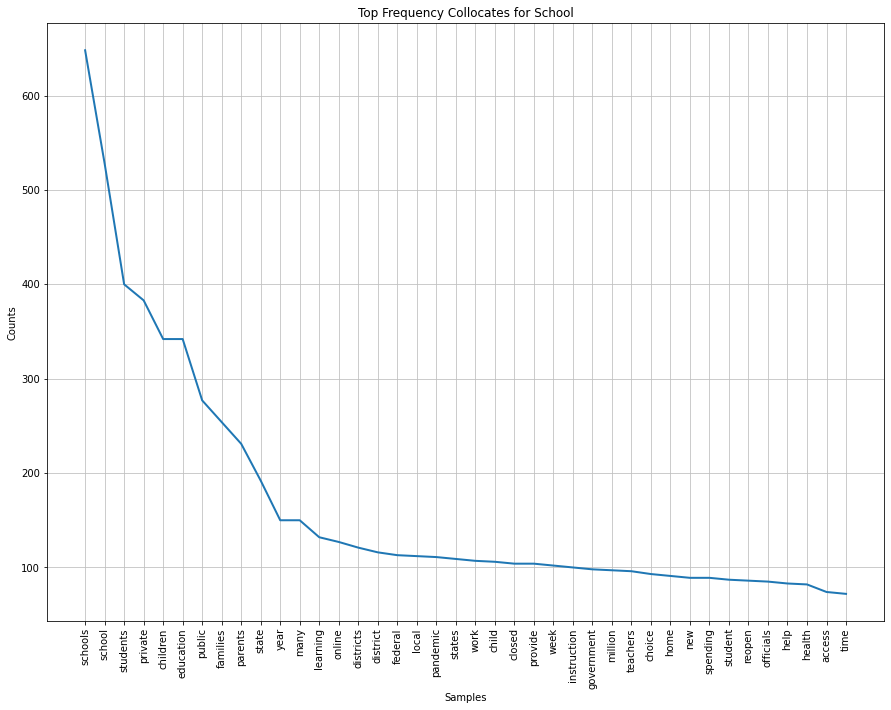

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 11))  # the size you want
tokenDist.plot(40, title="Top Frequency Collocates for " + word2find.capitalize())